# Assignment 2 - DAT341
## Group 23
## Group Members: Mirco Ghadri, Tobias Filmberg, Sameer Jathavedan
https://www.cse.chalmers.se/~richajo/dit866/assignments/a2/assignment2.html

In [1]:
import pandas as pd

## Task 1: Working with a dataset with categorical features

In [2]:
adult_train = pd.read_csv("adult_train.csv")
adult_test = pd.read_csv("adult_test.csv")

In [3]:
adult_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [4]:
adult_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Step 1. Reading the data

In [5]:
#separating the features from the target variable
adult_train_x = adult_train.drop(columns="target")
adult_train_y = adult_train["target"]
adult_test_x = adult_test.drop(columns="target")
adult_test_y = adult_test["target"]

### Step 2: Encoding the features as numbers.

In [6]:
from sklearn.feature_extraction import DictVectorizer
#convert the features into dictionaries so that they can be one-hot encoded
adult_train_dict = adult_train_x.to_dict("records")
adult_test_dict = adult_test_x.to_dict("records")
dv = DictVectorizer()
#one-hot encoding of the categorical columns
adult_train_encoded = dv.fit_transform(adult_train_dict)
adult_test_encoded = dv.transform(adult_test_dict)

In [7]:
print(adult_train_encoded[0])

  (0, 0)	27.0
  (0, 1)	0.0
  (0, 2)	0.0
  (0, 3)	10.0
  (0, 19)	1.0
  (0, 20)	44.0
  (0, 21)	1.0
  (0, 67)	1.0
  (0, 71)	1.0
  (0, 89)	1.0
  (0, 94)	1.0
  (0, 96)	1.0
  (0, 102)	1.0


### Computing accuracy on training and test set

From assignment 1, we knew that the model that had the highest accuracy on classifying data was the Gradient Boosted Classifier. Therefore we will use this classifier.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
gbc = GradientBoostingClassifier()

In [9]:
#How many folds does cross validation do? Seems like 5
cross_val_score(gbc, adult_train_encoded, adult_train_y)

array([0.86427146, 0.87223587, 0.86624693, 0.86210074, 0.8634828 ])

In [10]:
cross_val_score(gbc, adult_test_encoded, adult_test_y)

array([0.8633712 , 0.87407862, 0.86148649, 0.8713145 , 0.87192875])

### Step 3. Combining the steps.

In [11]:
from sklearn.pipeline import make_pipeline
  
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)

### We can see that the pipeline automatically calls DictVectorizer fit_transform() on the adult_train_dict before it uses the GradientBoostingClassifier to train on the data when we call pipeline.fit()

In [12]:
from sklearn.metrics import accuracy_score

pipeline.fit(adult_train_dict, adult_train_y)
y_pred = pipeline.predict(adult_test_dict)

### The test accuracy for the pipeline matches the test accuracy that we computed above using the manual steps(DictVectorizer + Gradient Boosting Classifier) on the data. Thus, we know that the pipeline works as expected

In [13]:
accuracy_score(adult_test_y,y_pred)

0.8711381364781033

## Task 2: Decision trees and random forests

### Underfitting and overfitting in decision tree classifiers.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

train_accuracy = []
test_accuracy = []

for i in range(1,18):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(adult_train_encoded,adult_train_y)
    train_accuracy.append(dtc.score(adult_train_encoded,adult_train_y))
    test_accuracy.append(dtc.score(adult_test_encoded, adult_test_y))

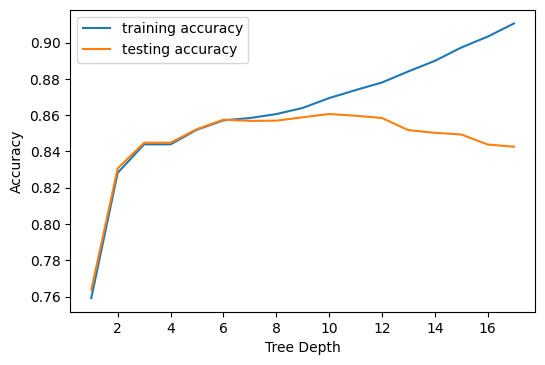

In [15]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.plot(range(1,18),train_accuracy, label="training accuracy")
plt.plot(range(1,18),test_accuracy, label = "testing accuracy")
plt.legend()
plt.show()

### A similar effect as in the experiment in Assignment 1, Task 4 step 4 can be observed. We see that as the tree depth goes above and beyond 6, the gap between the training and testing accuracy increases.

### Underfitting and overfitting in random forest classifiers.

### Ensemble size of 1 (1 Decision Tree in the random forest)

In [16]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy = []
test_accuracy = []

for i in range(1,18):
    rfc = RandomForestClassifier(n_estimators=1, max_depth=i)
    rfc.fit(adult_train_encoded,adult_train_y)
    train_accuracy.append(rfc.score(adult_train_encoded,adult_train_y))
    test_accuracy.append(rfc.score(adult_test_encoded, adult_test_y))

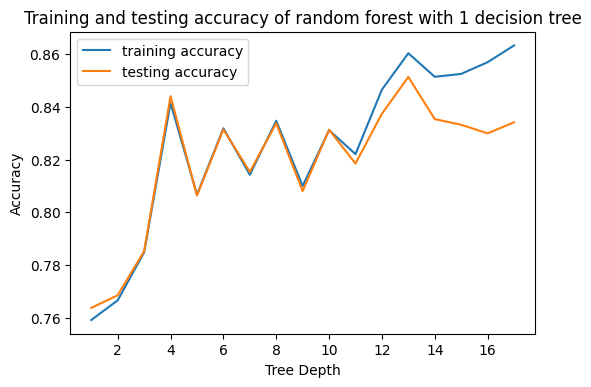

In [17]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training and testing accuracy of random forest with 1 decision tree")
plt.plot(range(1,18),train_accuracy, label="training accuracy")
plt.plot(range(1,18),test_accuracy, label = "testing accuracy")
plt.legend()
plt.show()

### 1. What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

We can see that when using a random forest, and having n_estimators set to 1, which means that there is 1 tree in the random forest, there is still a lot of difference in the training and testing accuracy in the random forest when comparing it to a single Decision Tree Classifier. The training and testing accuracy fluctuates a lot more in the random forest with 1 decision tree in it. This can be because a random forest always creates a different tree using a method called bagging. This means that when a random forest creates a tree, it selects a subset of the datapoints in the training data(with replacement) and uses this subset to create the tree. Thus, a different tree will be created everytime which can explain why the training and testing accuracy fluctuates so much. Also, random forests use a process known as feature bagging, which means that only a subset of the features are considered for each split when creating the tree. By default, the length of the subset of features that are considered for each split is the square root of the total number of features. So for example, if a dataset has 25 features, the random forest only considers 5 random features when it's creating/training its trees. Therefore, the tree that is created is much less predictable and different each time.

### Ensemble size of 5 (5 decision trees in the random forest)

In [35]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy = []
test_accuracy = []

for i in range(1,18):
    #n_jobs=-1 will allow the RandomForestClassifier to be trained faster because it will use all CPU cores
    rfc = RandomForestClassifier(n_estimators=5, max_depth=i, n_jobs=-1)
    rfc.fit(adult_train_encoded,adult_train_y)
    train_accuracy.append(rfc.score(adult_train_encoded,adult_train_y))
    test_accuracy.append(rfc.score(adult_test_encoded, adult_test_y))

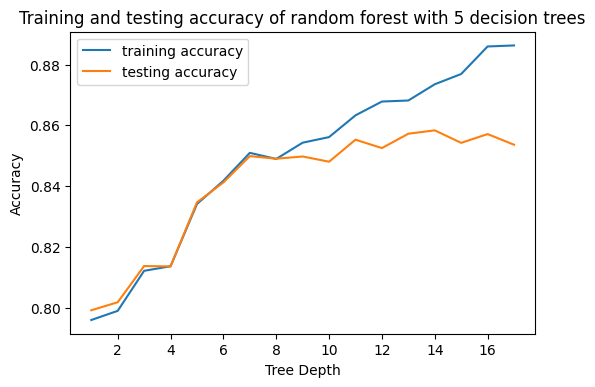

In [36]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training and testing accuracy of random forest with 5 decision trees")
plt.plot(range(1,18),train_accuracy, label="training accuracy")
plt.plot(range(1,18),test_accuracy, label = "testing accuracy")
plt.legend()
plt.show()

### Ensemble size of 10 (10 Decision Trees in the random forest)

In [20]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy = []
test_accuracy = []

for i in range(1,18):
    rfc = RandomForestClassifier(n_estimators=10, max_depth=i, n_jobs=-1)
    rfc.fit(adult_train_encoded,adult_train_y)
    train_accuracy.append(rfc.score(adult_train_encoded,adult_train_y))
    test_accuracy.append(rfc.score(adult_test_encoded, adult_test_y))

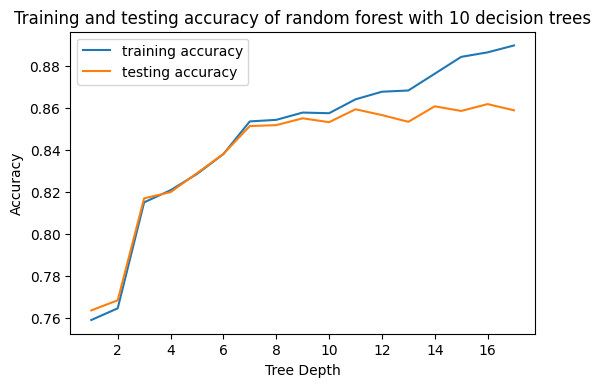

In [21]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training and testing accuracy of random forest with 10 decision trees")
plt.plot(range(1,18),train_accuracy, label="training accuracy")
plt.plot(range(1,18),test_accuracy, label = "testing accuracy")
plt.legend()
plt.show()

### Ensemble size of 100 (100 Decision Trees in the random forest)

In [22]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy = []
test_accuracy = []

for i in range(1,18):
    #The default value for n_estimators is 100. So we omit the parameter
    rfc = RandomForestClassifier(max_depth=i, n_jobs=-1)
    rfc.fit(adult_train_encoded,adult_train_y)
    train_accuracy.append(rfc.score(adult_train_encoded,adult_train_y))
    test_accuracy.append(rfc.score(adult_test_encoded, adult_test_y))

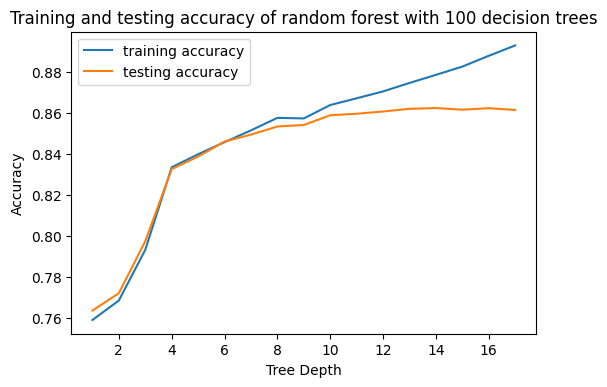

In [23]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training and testing accuracy of random forest with 100 decision trees")
plt.plot(range(1,18),train_accuracy, label="training accuracy")
plt.plot(range(1,18),test_accuracy, label = "testing accuracy")
plt.legend()
plt.show()

### 2. What happens with the curve for random forests as the ensemble size grows?

We can see that the curve stops fluctuating when the ensemble size grows. Instead, the accuracy increases smoothly as the tree depth increases. The erratic behavior of the curve dissappears when tree size increases because even if 1 tree is very different from another tree, the prediction that is used is the most common prediction when considering all trees. Therefore the prediction will be more stable since it does not only rely on 1 tree and the prediction accuracy will also be more stable as we can observe. 

### 3. What happens with the best observed test set accuracy as the ensemble size grows?

The best observed test set accuracy does not change much as the ensemble size grows. It settles somwhere around 0.85

### 4. What happens with the training time as the ensemble size grows?

The training time increases as the ensemble size grows. This is because more trees have to be created in the training phase of the random forest model which takes more time.

## Task 3: Feature importances in random forest classifiers

### Sort the features by importance scores in reverse order (so that the most important feature comes first), inspect the first few of these features, and try to reason about why you got this result.

### We will use the feature importance scores of a single decision tree classifier as well as feature importance scores of a random forest and compare them.

### Feature Importance score for 1 Decision Tree Classifier.

In [48]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(adult_train_encoded, adult_train_y)
dtc.feature_importances_

array([1.17550594e-02, 2.18473012e-01, 4.69466585e-02, 2.34492663e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.94393793e-04, 0.00000000e+00, 0.00000000e+00,
       2.19894688e-02, 0.00000000e+00, 0.00000000e+00, 4.65286076e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [49]:
dv.feature_names_

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'education=10th',
 'education=11th',
 'education=12th',
 'education=1st-4th',
 'education=5th-6th',
 'education=7th-8th',
 'education=9th',
 'education=Assoc-acdm',
 'education=Assoc-voc',
 'education=Bachelors',
 'education=Doctorate',
 'education=HS-grad',
 'education=Masters',
 'education=Preschool',
 'education=Prof-school',
 'education=Some-college',
 'hours-per-week',
 'marital-status=Divorced',
 'marital-status=Married-AF-spouse',
 'marital-status=Married-civ-spouse',
 'marital-status=Married-spouse-absent',
 'marital-status=Never-married',
 'marital-status=Separated',
 'marital-status=Widowed',
 'native-country=?',
 'native-country=Cambodia',
 'native-country=Canada',
 'native-country=China',
 'native-country=Columbia',
 'native-country=Cuba',
 'native-country=Dominican-Republic',
 'native-country=Ecuador',
 'native-country=El-Salvador',
 'native-country=England',
 'native-country=France',
 'native-country=Germany',
 

In [50]:
#sort feature_importances_ from highest to lowest, while remembering the column position
indices = range(107)
feature_importances = sorted(list(zip(dtc.feature_importances_, indices)), reverse=True)
print(feature_importances)

[(0.4652860762776799, 23), (0.23449266282782444, 3), (0.21847301246417028, 1), (0.04694665854355955, 2), (0.02198946883889202, 20), (0.011755059371818876, 0), (0.00039439379302728744, 17), (0.00029643698326237204, 104), (0.0002889281676801234, 100), (7.730273208518886e-05, 75), (0.0, 106), (0.0, 105), (0.0, 103), (0.0, 102), (0.0, 101), (0.0, 99), (0.0, 98), (0.0, 97), (0.0, 96), (0.0, 95), (0.0, 94), (0.0, 93), (0.0, 92), (0.0, 91), (0.0, 90), (0.0, 89), (0.0, 88), (0.0, 87), (0.0, 86), (0.0, 85), (0.0, 84), (0.0, 83), (0.0, 82), (0.0, 81), (0.0, 80), (0.0, 79), (0.0, 78), (0.0, 77), (0.0, 76), (0.0, 74), (0.0, 73), (0.0, 72), (0.0, 71), (0.0, 70), (0.0, 69), (0.0, 68), (0.0, 67), (0.0, 66), (0.0, 65), (0.0, 64), (0.0, 63), (0.0, 62), (0.0, 61), (0.0, 60), (0.0, 59), (0.0, 58), (0.0, 57), (0.0, 56), (0.0, 55), (0.0, 54), (0.0, 53), (0.0, 52), (0.0, 51), (0.0, 50), (0.0, 49), (0.0, 48), (0.0, 47), (0.0, 46), (0.0, 45), (0.0, 44), (0.0, 43), (0.0, 42), (0.0, 41), (0.0, 40), (0.0, 39), (

In [51]:
sorted_values = [t[0] for t in feature_importances]
print(sorted_values)

[0.4652860762776799, 0.23449266282782444, 0.21847301246417028, 0.04694665854355955, 0.02198946883889202, 0.011755059371818876, 0.00039439379302728744, 0.00029643698326237204, 0.0002889281676801234, 7.730273208518886e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [52]:
sorted_indices = [t[1] for t in feature_importances]
print(sorted_indices)

[23, 3, 1, 2, 20, 0, 17, 104, 100, 75, 106, 105, 103, 102, 101, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 22, 21, 19, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]


### We have now sorted the feature names in reverse chronological order based on feature importance score

In [53]:
feature_names_sorted = [dv.feature_names_[i] for i in sorted_indices]
feature_names_sorted

['marital-status=Married-civ-spouse',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'age',
 'education=Preschool',
 'workclass=Self-emp-not-inc',
 'workclass=Local-gov',
 'occupation=Farming-fishing',
 'workclass=Without-pay',
 'workclass=State-gov',
 'workclass=Self-emp-inc',
 'workclass=Private',
 'workclass=Never-worked',
 'workclass=Federal-gov',
 'workclass=?',
 'sex=Male',
 'sex=Female',
 'relationship=Wife',
 'relationship=Unmarried',
 'relationship=Own-child',
 'relationship=Other-relative',
 'relationship=Not-in-family',
 'relationship=Husband',
 'race=White',
 'race=Other',
 'race=Black',
 'race=Asian-Pac-Islander',
 'race=Amer-Indian-Eskimo',
 'occupation=Transport-moving',
 'occupation=Tech-support',
 'occupation=Sales',
 'occupation=Protective-serv',
 'occupation=Prof-specialty',
 'occupation=Priv-house-serv',
 'occupation=Other-service',
 'occupation=Machine-op-inspct',
 'occupation=Handlers-cleaners',
 'occupation=Exec-managerial',
 'occupation=

In [54]:
feature_names_and_values_sorted = list(zip(feature_names_sorted, sorted_values))
feature_names_and_values_sorted

[('marital-status=Married-civ-spouse', 0.4652860762776799),
 ('education-num', 0.23449266282782444),
 ('capital-gain', 0.21847301246417028),
 ('capital-loss', 0.04694665854355955),
 ('hours-per-week', 0.02198946883889202),
 ('age', 0.011755059371818876),
 ('education=Preschool', 0.00039439379302728744),
 ('workclass=Self-emp-not-inc', 0.00029643698326237204),
 ('workclass=Local-gov', 0.0002889281676801234),
 ('occupation=Farming-fishing', 7.730273208518886e-05),
 ('workclass=Without-pay', 0.0),
 ('workclass=State-gov', 0.0),
 ('workclass=Self-emp-inc', 0.0),
 ('workclass=Private', 0.0),
 ('workclass=Never-worked', 0.0),
 ('workclass=Federal-gov', 0.0),
 ('workclass=?', 0.0),
 ('sex=Male', 0.0),
 ('sex=Female', 0.0),
 ('relationship=Wife', 0.0),
 ('relationship=Unmarried', 0.0),
 ('relationship=Own-child', 0.0),
 ('relationship=Other-relative', 0.0),
 ('relationship=Not-in-family', 0.0),
 ('relationship=Husband', 0.0),
 ('race=White', 0.0),
 ('race=Other', 0.0),
 ('race=Black', 0.0),
 (

### Inspect the first few of these features, and try to reason about why you got this result

It makes sense that some features are more important for predicting whether a person makes above or below 50k dollars in yearly salary. The feature married makes sense because usually a person marries when they are financially stable or independant. Similarily the feature age also makes sense, because an older person has more time to make a career than a younger person and this affects the income of that person. The level of education also makes sense since a person with a higher level of education also can land a higher paying job such as doctor or engineer. Hours per week also makes sense, how much time you spend working is one of the factors for how much you earn. Of course it also depends on your hourly salary.

### Feature Importance score for Random Forest with 100 Decision Trees and max_depth of 5

In [37]:
#default ensemble size is 100
rfc = RandomForestClassifier(max_depth=5, n_jobs = -1)
rfc.fit(adult_train_encoded, adult_train_y)
rfc.feature_importances_

array([4.93223309e-02, 1.49617939e-01, 2.34276316e-02, 9.81422413e-02,
       9.25505399e-04, 8.21491139e-04, 4.17597347e-05, 1.98532625e-06,
       2.77560014e-04, 7.68400826e-04, 1.47219017e-04, 5.56928310e-05,
       3.13152939e-04, 3.02205589e-02, 4.20224656e-03, 1.22638795e-02,
       1.38001829e-02, 1.37408805e-05, 8.55259634e-03, 5.59807305e-04,
       2.58869076e-02, 6.75488162e-03, 1.18113190e-04, 1.73222230e-01,
       4.63776336e-05, 4.51991504e-02, 1.19355565e-03, 4.94693221e-04,
       5.01885820e-05, 4.22642086e-06, 4.58792805e-05, 4.97338220e-05,
       0.00000000e+00, 1.88068236e-05, 8.02894449e-06, 2.90550837e-05,
       1.06221087e-05, 3.73317870e-05, 4.26921712e-05, 2.98473468e-05,
       3.03050079e-05, 1.33679509e-06, 0.00000000e+00, 0.00000000e+00,
       3.61864089e-06, 3.71277790e-05, 3.83730166e-06, 3.14475487e-05,
       1.78686187e-05, 2.79288452e-05, 2.36542570e-05, 3.39712425e-06,
       6.14460252e-05, 7.43654119e-07, 8.24661797e-04, 3.74707318e-06,
      

In [38]:
feature_importances = sorted(list(zip(rfc.feature_importances_, indices)), reverse=True)
print(feature_importances)

[(0.17322222978853358, 23), (0.16463086983318978, 90), (0.14961793862006, 1), (0.09814224127504771, 3), (0.04932233090879571, 0), (0.04519915037277624, 25), (0.03592545230815607, 93), (0.030220558948410303, 13), (0.025886907564035482, 20), (0.024919882956673384, 97), (0.023427631643995066, 2), (0.022705894020429575, 74), (0.020508607668173827, 91), (0.01697634971531078, 96), (0.016651755717411846, 80), (0.015639261392773978, 95), (0.013800182902366441, 16), (0.012263879456861256, 15), (0.008552596341141964, 18), (0.00802171149421302, 78), (0.0067548816215375375, 21), (0.006643455202821682, 94), (0.0053905857150023506, 103), (0.004202246563559082, 14), (0.002496888148106009, 75), (0.0015196354207254882, 104), (0.001194074492165444, 77), (0.0011935556473060885, 26), (0.0010430243923237582, 87), (0.0009255053988593608, 4), (0.0008405874168658539, 99), (0.0008319456433733972, 76), (0.0008261244917492766, 73), (0.0008246617966028612, 54), (0.0008214911386574587, 5), (0.0007684008257188257, 

In [39]:
sorted_values = [t[0] for t in feature_importances]
sorted_indices = [t[1] for t in feature_importances]

In [40]:
sorted_feature_names = [dv.feature_names_[i] for i in sorted_indices]
sorted_feature_names_and_values = list(zip(sorted_feature_names,sorted_values))
sorted_feature_names_and_values

[('marital-status=Married-civ-spouse', 0.17322222978853358),
 ('relationship=Husband', 0.16463086983318978),
 ('capital-gain', 0.14961793862006),
 ('education-num', 0.09814224127504771),
 ('age', 0.04932233090879571),
 ('marital-status=Never-married', 0.04519915037277624),
 ('relationship=Own-child', 0.03592545230815607),
 ('education=Bachelors', 0.030220558948410303),
 ('hours-per-week', 0.025886907564035482),
 ('sex=Male', 0.024919882956673384),
 ('capital-loss', 0.023427631643995066),
 ('occupation=Exec-managerial', 0.022705894020429575),
 ('relationship=Not-in-family', 0.020508607668173827),
 ('sex=Female', 0.01697634971531078),
 ('occupation=Prof-specialty', 0.016651755717411846),
 ('relationship=Wife', 0.015639261392773978),
 ('education=Masters', 0.013800182902366441),
 ('education=HS-grad', 0.012263879456861256),
 ('education=Prof-school', 0.008552596341141964),
 ('occupation=Other-service', 0.00802171149421302),
 ('marital-status=Divorced', 0.0067548816215375375),
 ('relations

### Inspect the first few of these features, and try to reason about why you got this result

When using a random forest, we can see that less features are given importance score of 0, so the importance score is distributed to more features. This makes sense because the result depends not so much on the predictions of only 1 tree, that might not consider some features important, but on all the trees in the random forest(100). 
We see that one of the most important features is still whether someone has married or not(sometimes it is the most important feature but it varies between running times). However, the importance score of this feature in the random forest is almost half as small as it is in the decision tree. In the decision tree, this feature was given an importance score of 0.46.

### For your report, please also mention an alternative way to compute some sort of importance score of individual features. (You don't need to implement it.) Here, you can either use your common sense, or optionally read the discussion by Parr et al. (2018) that gives some criticism of decision tree-based feature importance scores and discusses some alternatives.

There are 2 alternatives to the default feature importance score for decision trees in sci-kit learn. These are permutation
importance and drop-column importance.
Permutation importance works by calculating the test set accuracy of a model. It then randomly shuffles all of the column values
for a particular feature and recalculates the test set accuracy. The feature importance score is calculated as the difference
between the initial accuracy of the model on the testing set and the accuracy of the model on the testing set after the values
for that particular feature have been shuffled. If the difference is large, it means that shuffling the values of that feature
negatively impacted the models accuracy on the testing set, and thus that feature is important in predicting the outcome.
Similarily, if the difference is small, it means that after shuffling the column values for that particular feature, it did not 
affect the accuracy of the model on the test set that much, thus the feature is not as important.

Drop-column importance scores for features work similarily, except that instead of shuffling the values for a feature, they 
drop that feature from the dataset completly. After the feature has been dropped from the dataset, it retrains the model without
the missing feature, then recalculates the models accuracy score on the testing set. If the models accuracy has dropped a lot,
it means that the feature was important. If not, then it means that the model performs fine even without the feature, so it is 
less important.[1]

[1] https://explained.ai/rf-importance/

